In [125]:
import pandas as pd
import os
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image, ImageDraw
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

classes = {0:'Не дефект',
           1:"Потертость",
           2:"Черная точка",
           3:"Плена",
           4:"Маркер",
           5:"Грязь",
           6:"Накол",
           7:"н.д Накол",
           8:"Микровыступ",
           9:"н.д Микровыступ",
           10:"Вмятина",
           11:"Мех. повреждение",
           12:"Риска",
           13:"Царапина с волчком"}

In [147]:
current_frame = ''
defects_list = []
is_frame = False
with open('./metadata/set.cfg', 'r',encoding='latin-1') as f:
    txt = f.read()
    for txt_stroke in txt.split('\n'):
        if txt_stroke[-6:]=='.frame':
            current_frame = ('./FRAMES\\'+txt_stroke).replace('\\','/')
            if os.path.isfile(current_frame):
                is_frame = True
            else:
                is_frame = False
            # print(current_frame)
        else:
            if is_frame:
                defect = [current_frame]
                defect.extend(txt_stroke.split(','))
                defects_list.append(defect)

df = pd.DataFrame(defects_list).dropna()
df.columns = ['path','w','h','label']
df = df.astype({'w':int,'h':int,'label':int})
df

,path,w,h,label
0,./FRAMES/0/1538/frame0006.frame,809,336,3
1,./FRAMES/0/1538/frame0006.frame,601,299,0
2,./FRAMES/0/1538/frame0007.frame,667,318,3
3,./FRAMES/0/1538/frame0007.frame,811,523,3
4,./FRAMES/0/1538/frame0007.frame,445,300,0
...,...,...,...,...
28828,./FRAMES/2023.09.07 13-09-28 78-23-04_1/5_894....,273,448,0
28829,./FRAMES/2023.09.07 13-09-28 78-23-04_1/5_894....,273,507,0
28830,./FRAMES/2023.09.07 13-09-28 78-23-04_1/5_899....,804,212,0
28831,./FRAMES/2023.09.07 13-09-28 78-23-04_1/5_899....,214,271,0


In [66]:
df.path.unique().shape

(5913,)

In [227]:
def get_defect(df,n):
    d = df.iloc[n]
    stream = open(d.path,'rb')
    bytes = bytearray(stream.read())
    data = np.asarray(bytes, dtype=np.uint8)
    data = data[8:].reshape(600,960)
    backgorund = Image.new(mode="L",size=(600+300,960+300))
    im = Image.fromarray(data.T)
    backgorund.paste(im,(150,150))
    draw = ImageDraw.Draw(backgorund)
    draw.rectangle([d.h+150-80,d.w+150-80,d.h+150+80,d.w+150+80],outline='#ffffff')
    im = backgorund.crop([d.h-75,d.w-75,d.h+300+75,d.w+300+75])
    return np.array(im.convert("L"))

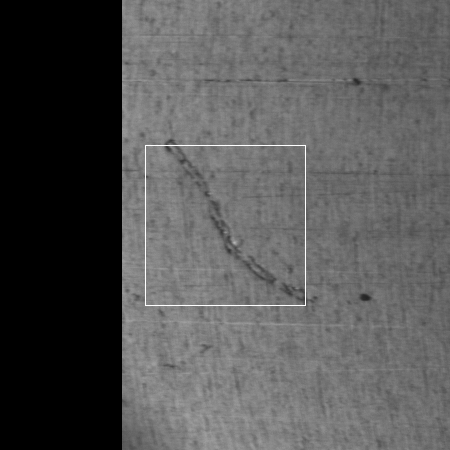

In [228]:
Image.fromarray(get_defect(df,58))

In [ ]:
def create_subtitle(fig, grid,  title):
    "Sign sets of subplots with title"
    row = fig.add_subplot(grid)
    # the '\n' is important
    row.set_title(f'{title}\n', fontweight='semibold')
    # hide subplot
    row.set_frame_on(False)
    row.axis('off')

nrows = 14
ncols = 5
fig, axs = plt.subplots(nrows, ncols,figsize=(5*3,14*3), sharey=True)
grid = plt.GridSpec(nrows, ncols)



for r in range(nrows):
    rn = np.random.choice(df[df.label==r].index,ncols)
    create_subtitle(fig, grid[r, ::], classes.get(r))
    for i,c in enumerate(rn):
        defect = get_defect(df,c)
        ax = axs[r,i]
        ax.imshow(defect,cmap='gray')
        ax.set_title(str(c)+" - "+ df.iloc[c].path, size=5)
        ax.axis("off")
        


